In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Greedy, LNA, LPF, Sinc

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
#mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')

8.030570172000001


In [4]:
#initc = [u_hs, u_lr, u_sr, u_C1, u_C2, u_C3, u_C4, u_C5, u_sg]
#basis = [svd_basis, trig_basis, greedy_basis, lna_basis, lpf_basis]
# 9 ic
# 5 bv
# 4 errors
# r entries

#results = np.zeros((6, 9, 4, r))
epsilon = 0.025
u_hs = Heaviside()
u_lr = LinearRamp(epsilon)
u_sr = SmoothRamp(epsilon)
u_C1 = CkRamp(epsilon, 1)
u_C2 = CkRamp(epsilon, 2)
u_C3 = CkRamp(epsilon, 3)
u_C4 = CkRamp(epsilon, 4)
u_C5 = CkRamp(epsilon, 5)
u_sg = Sigmoid(1/epsilon)

tt = np.linspace(0, 1, 10000)
results_path = "C:/Users/florianma/Dropbox/Kol-N-width-Oslo-Ulm/n_widths_for_transport/results/"
initc = [u_hs, u_lr, u_C1, u_C2, u_C3, u_C4, u_C5, u_sg]  # u_sr, 

In [5]:
u = u_lr

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


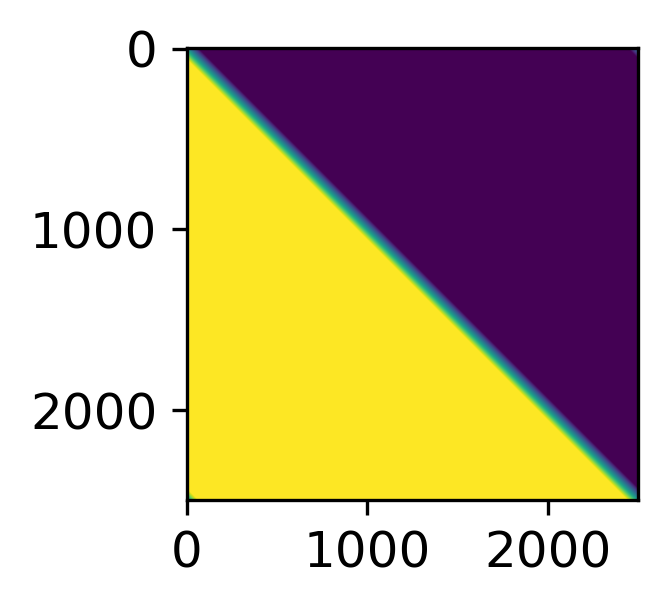

In [6]:
m, n, r = 2500, 2500, 500
x = Domain([0, 1], m)
mu = Domain([0, 1], n)
X_ref = u(x(), mu())
plt.imshow(X_ref)
plt.show()

$u(x, \mu)=f(x-at)$

$x \in [0, 1]$; a samples

$a \in [0, 1]$; b samples

$t \in [0, 1]$; c samples

space-time: snapshot matrix with $a*b$ x $c$ snapshots

In [7]:
a, b, c, r = 50, 50, 50*50, 500
x = Domain([0, 1], a)
t = Domain([0, 1], b)
v = Domain([0, 1], c)

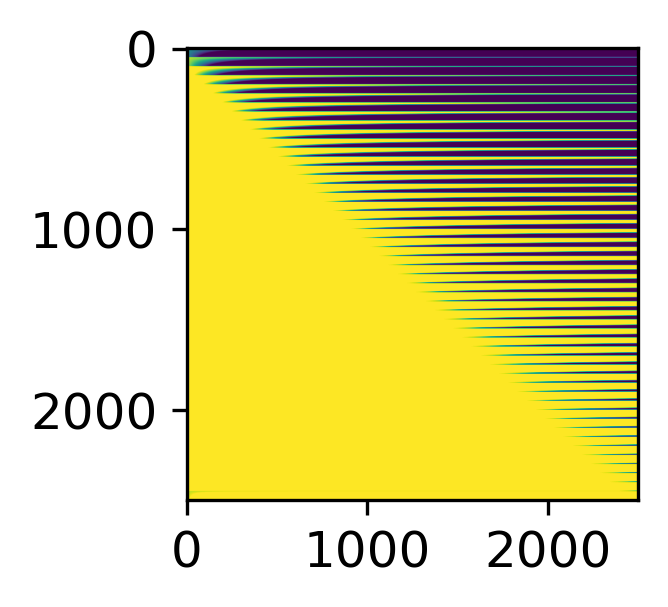

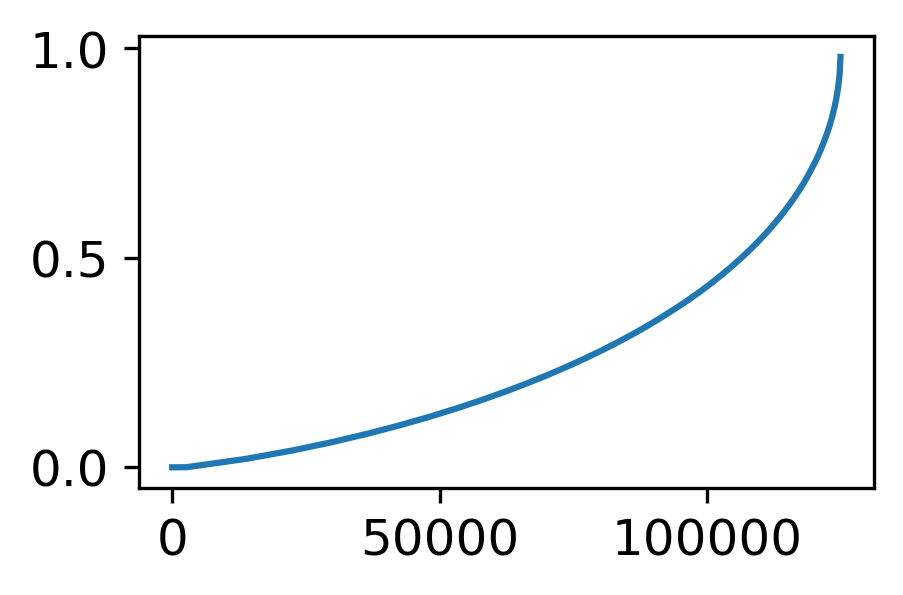

In [8]:
X_st = np.empty((a*b, c))
mus = np.empty((b, c))
for j, vj in enumerate(v()):
    mu = t()*vj
    mus[:, j] = t()*vj
    space_time_snapshot = u(x(), mu)
    X_st[:, j] = space_time_snapshot.ravel()
plt.imshow(X_st)
plt.show()

mus = mus.ravel()
mus.sort()
fig, ax = plt.subplots()
ax.plot(mus)
plt.show()

In [9]:
svd_basis1 = SVD(X_ref)
svd_basis2 = SVD(X_st)

In [10]:
e1, _ = svd_basis1.calc_error()
e2, _ = svd_basis2.calc_error()

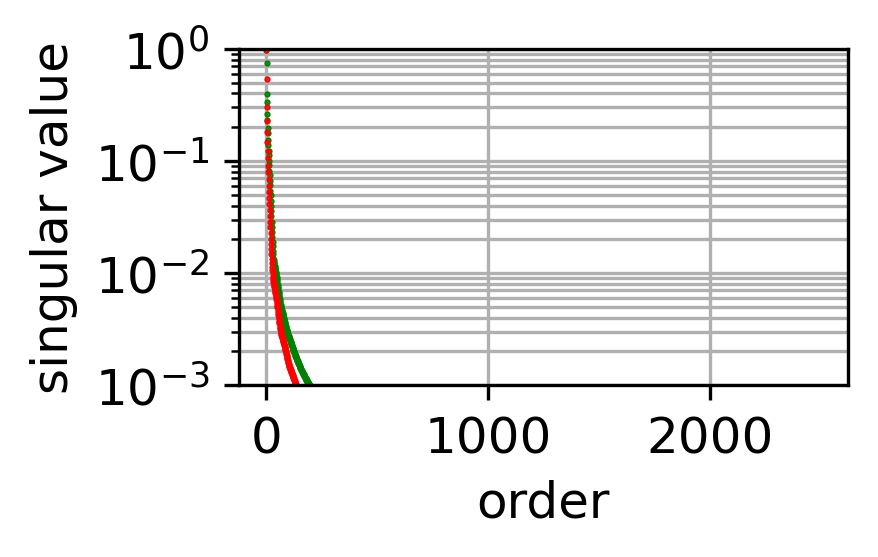

In [11]:
fig, ax = plt.subplots()
ax.plot(e1, "g.", ms=1)
ax.plot(e2, "r.", ms=1)


ax.set_xlabel("order")
ax.set_ylabel("singular value")
ax.set_yscale('log')
ax.grid(which="both")
plt.tight_layout()
ax.set_ylim([1e-3, 1])
plt.show()